# Filtering & Data Prep

In [1]:
import importlib
from pathlib import Path

import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline


import preprocess as pp
import models
import engine

In [2]:
importlib.reload(pp)
importlib.reload(models)
importlib.reload(engine)

<module 'engine' from '/Users/davidspector/Home/UCSD/py_cnn/data-science/engine.py'>

In [3]:
DF_DIR = Path("/Volumes/CREST Data/David_S_Data/ExactData/Downloaded_Pkl")
BATCH_SIZE = 15
EPOCHS = 400
N_FOLDS = np.array([5,6,7,8,9,10,11,12,13,14,15]) #[1,2,3,4,5,6,7,8,9,10]

In [4]:
train_df = pd.read_pickle(DF_DIR / Path('Train_df-PS04_snapshot01.pkl'))
test_df = pd.read_pickle(DF_DIR / Path('Test_df-PS04_snapshot01.pkl'))
val_df = pd.read_pickle(DF_DIR / Path('Val_df-PS04_snapshot01.pkl'))

In [7]:
x_train_4D, y_train_4D, x_valid_4D, y_valid_4D, x_test_4D, y_test_4D, pct_cancer_weights, psa_train, psa_valid, psa_test = pp.create_4D(train_df, val_df, test_df, 'PS', sub_gain=1)

  0%|          | 0/5220 [00:00<?, ?it/s]0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
100%|██████████| 1310/1310 [00:00<00:00, 655672.82it/s]


In [7]:
del train_df, test_df, val_df

In [8]:
x_test_4D, y_test_4D, psa_test = pp.filter_data(x_test_4D, y_test_4D, psa_test)

In [9]:
x_train_4D = pp.data_norm_stand(x_train_4D)
x_valid_4D = pp.data_norm_stand(x_valid_4D)
x_test_4D = pp.data_norm_stand(x_test_4D)

In [10]:
Xa, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'a')
Xb, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'b')
Xc, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'c')
Xd, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'d')
Xe, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'e')
Xf, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'f')
Xg, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'g')
Xh, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'h')
Xi, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'i')
x_train = [Xa,Xb,Xc,Xd,Xe,Xf,psa_train]
y_train = Y

Xva, Yv = pp.resample_augment(x_valid_4D, Xa, y_valid_4D,'a')
Xvb, Yv = pp.resample_augment(x_valid_4D, Xb, y_valid_4D,'b')
Xvc, Yv = pp.resample_augment(x_valid_4D, Xc, y_valid_4D,'c')
Xvd, Yv = pp.resample_augment(x_valid_4D, Xd, y_valid_4D,'d')
Xve, Yv = pp.resample_augment(x_valid_4D, Xe, y_valid_4D,'e')
Xvf, Yv = pp.resample_augment(x_valid_4D, Xf, y_valid_4D,'f')
Xvg, Yv = pp.resample_augment(x_valid_4D, Xg, y_valid_4D,'g')
Xvh, Yv = pp.resample_augment(x_valid_4D, Xh, y_valid_4D,'h')
Xvi, Yv = pp.resample_augment(x_valid_4D, Xi, y_valid_4D,'i')
x_valid = [Xva,Xvb,Xvc,Xvd,Xve,Xvf,psa_valid]
y_valid = Yv

Xta, Yt = pp.resample_augment(x_test_4D, Xa, y_test_4D,'a')
Xtb, Yt = pp.resample_augment(x_test_4D, Xb, y_test_4D,'b')
Xtc, Yt = pp.resample_augment(x_test_4D, Xc, y_test_4D,'c')
Xtd, Yt = pp.resample_augment(x_test_4D, Xd, y_test_4D,'d')
Xte, Yt = pp.resample_augment(x_test_4D, Xe, y_test_4D,'e')
Xtf, Yt = pp.resample_augment(x_test_4D, Xf, y_test_4D,'f')
Xtg, Yt = pp.resample_augment(x_test_4D, Xg, y_test_4D,'g')
Xth, Yt = pp.resample_augment(x_test_4D, Xh, y_test_4D,'h')
Xti, Yt = pp.resample_augment(x_test_4D, Xi, y_test_4D,'i')
x_test = [Xta,Xtb,Xtc,Xtd,Xte,Xtf,psa_test]
y_test = Yt


In [11]:
del Xa, Xb, Xc, Xd, Xe, Xf, Xg, Xh, Xi, Y
del Xva, Xvb, Xvc, Xvd, Xve, Xvf, Xvg, Xvh, Xvi, Yv
del Xta, Xtb, Xtc, Xtd, Xte, Xtf, Xtg, Xth, Xti
del x_train_4D, y_train_4D, x_valid_4D, y_valid_4D, x_test_4D, y_test_4D

# Training

In [12]:
workdir = "/Users/davidspector/Home/UCSD/py_cnn/data-science/models-out/"
log_dir = Path("/Users/davidspector/Home/UCSD/py_cnn/data-science/logs/")
batch_size = 15
epochs = 400
nFold = np.array([5,6,7,8,9,10,11,12,13,14,15])

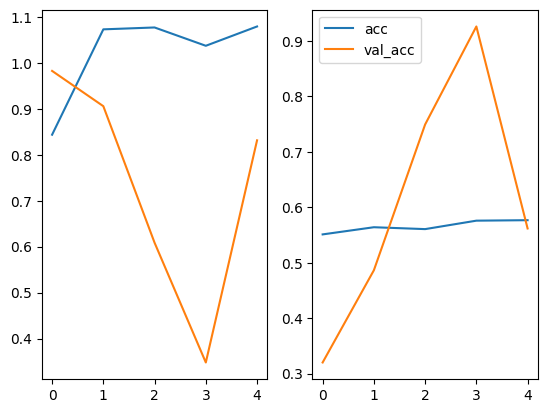

348/348 ━━━━━━━━━━━━━━━━━━━━ 88s 253ms/step - acc: 0.5718 - loss: 1.0941 - val_acc: 0.5619 - val_loss: 0.8315 - learning_rate: 8.5000e-04
0.00085
Epoch 6/400
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - acc: 0.5772 - loss: 1.1014

KeyboardInterrupt: 

In [24]:
import utils
importlib.reload(utils)
importlib.reload(models)
importlib.reload(engine)
full_model = models.model_3d_00(x_train[0], y_train, psa_train, workdir)
full_model, history = engine.train_model(full_model, x_train, y_train, x_valid, y_valid, batch_size, epochs, pct_cancer_weights, log_dir) #0.0008 ,Xe,Xf,,Xve,Xvf

In [5]:
train_df.head()

,Core,Gain,Hospital,Label,NPS,PS,PSA,Patient,PctCancer,PrimGrade,SecGrade,Name
0,LAL,29.9986103688254,CRCEO,Benign,[[[[-14.86263123 -15.13942091 -15.87525703 -17...,[[[[52.26004301 52.27143733 52.00259633 51.292...,4.11,0133,0,[],[],CRCEO_0133
1,RMM,29.9986103688254,PCC,Benign,[[[[ 4.287157 4.37941997 4.36411186 4.385...,[[[[65.32505693 65.70332014 66.15368739 66.715...,8.6,0218,0,[],[],PCC_0218
2,LAM,39.9986103688254,PCC,Benign,[[[[-2.14134153e+00 -1.76453516e+00 -2.2393942...,[[[[59.55810479 59.70957109 59.46954546 58.942...,5.8,0089,0,[],[],PCC_0089
3,LBL,29.9986103688254,CRCEO,Benign,[[[[ -8.80005274 -9.13136489 -9.39580372 -9...,[[[[46.91796786 46.82674905 46.99327844 47.021...,15.0,0226,0,[],[],CRCEO_0226
4,RAM,40.0100466965317,UVA,GS8,[[[[ 7.8970021 8.34736207 8.16759166 7.951...,[[[[68.75020247 68.95280843 68.982437 69.060...,5.26,0036,60,4,4,UVA_0036


In [6]:
np.array(train_df['NPS'].tolist()[0]).shape

(1, 3, 324, 129)

In [24]:
train_df.loc[train_df['Core'] == 'RAL'].loc[train_df['Name'] == 'UVA_0628']

,Core,Gain,Hospital,Label,NPS,PS,PSA,Patient,PctCancer,PrimGrade,SecGrade,Name
3146,RAL,29.9986103688254,UVA,GS10,[[[[ 0.15156273 0.25964458 0.2033468 0.039...,[[[[60.46670017 60.80089881 61.15622305 61.517...,1.2,0628,100,5,5,UVA_0628


3 324 129


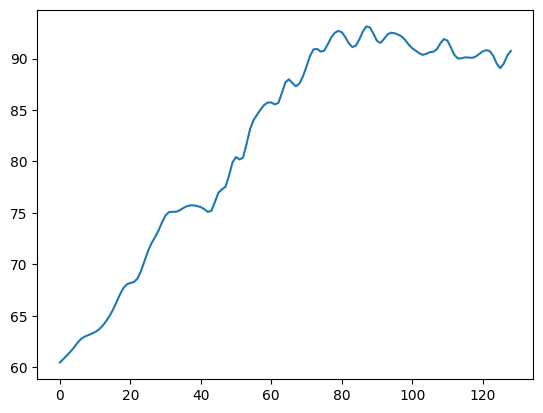

: 

In [31]:
print(len(train_df['NPS'][3146][0]), len(train_df['NPS'][3146][0][0]), len(train_df['NPS'][3146][0][0][0]))
plt.plot(train_df['PS'][3146][0][0][0])